#  Machine Learning with Python - Classification

In this exercise, you will learn how to formulate and solve a **classification problem**. A classification problem amounts to finding a good predictor or classifier which maps a given data point via its features to a predicted value of its label (which is the quantity of interest). 

Remember that **regression problems** are machine learning problems that involve data points with a numeric label such as the grayscale level of a pixel. In contrast, **classification problems** arise from data points whose labels have only a finite number of different values. The most simple classification problem is a **binary classification problem** where the label can take on only two different values such as $y=0$ vs. $y=1$ or $y$="picture includes a pedestrian crossing" vs. $y$="picture does not include pedestrian crossing". The label $y$ of a data point indicates to which class (or category) the data point belongs to. 

We consider two widely used methods for solving classification problems: **logistic regression** and **decision trees**. These two methods differ in the choice of hypothesis space, i.e., the set of predictor functions $h(\mathbf{x})$ that map the features $\mathbf{x}$ of a data point to a predicted label $\hat{y}=h(\mathbf{x})$ (which is hopefully a good approximation of the true label $y$). 

We mainly consider binary classification problems with data points having labels from a set of size two such as $\{0,1\}$ or {"image shows a crossing", "image shows no crossing"}. However, we will also discuss a simple approach to upgrade any binary classification method to solve classification problems with more than two label values such as {"image shows one crossing", "image shows more than one crossing", "image shows no crossing"}. We refer to classification problems with more than two label values (or categories) as **multi-class classification problems**. 

## Learning goals

After this round, you should  

- be able to model "real-world" applications as classification problems by identifying features and labels. 
- be able to solve classification problems using logistic regression or decision trees. 
- be able to assess the reliability of classifications provided by logistic regression. 
- know about the differences between decision trees and logistic regression. 
- know how to extend binary classification methods to multi-class problems where labels can take on more than two different values. 


## Additional Material 
* Relevant Sections in [Course Book](https://arxiv.org/abs/1805.05052)  (Chapter 2, 3.4 and 3.6)
* [video-lecture](https://www.youtube.com/watch?v=-la3q9d7AKQ) of Prof. Andrew Ng on classification problems and logistic regression 
* [video-lecture](https://www.youtube.com/watch?v=ZvaELFv5IpM) of Prof. Andrew Ng on extending binary classification methods to multi-class problems 

## The Problem

<img src="../../../coursedata/R3_Classification/CrossingDetection.png" alt="Drawing" style="width: 600px;"/>

The city planners of Helsinki are regularly sending small airplanes over Helsinki to take high-resolution aerial photographs of different city areas. These aerial photographs are available via the open data service at https://kartta.hel.fi. It is important to monitor the condition of pedestrian crossings to determine if a renewal is necessary. To this end, we want to find those areas which contain a pedestrian crossing. 

In this exercise, you will learn how to use classification methods to determine if a particular area contains a pedestrian (zebra) crossing or not. We model this pedestrian crossing detection as a machine learning problem. The problem amounts to learn a predictor (or classifier) map $h(\mathbf{x})$ which delivers a predicted label $\hat{y} = h(\mathbf{x})$ which indicates if a certain area contains a pedestrian crossing or not. The classification is based on numeric features $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$ that are computed from an aerial photograph of the area in question.  

We will solve this binary classification problem using two different classification methods: logistic regression and decision trees. These two methods differ in the choice of hypothesis space. Decision tree classifiers use a flow-chart representation of the predictor function. In contrast, logistic regression uses the hypothesis space of linear predictor functions which is also used in linear regression (see Round 2 - Regression). 

The difference between logistic and linear regression is the set of label values, which is the real numbers for linear regression and a set of size two for logistic regression. Another difference between linear and logistic regression is the loss function. While linear regression is based on minizing the squared error loss, logistic regression minimizes the logistic loss function which will be explained below. 

As you might already know, most machine learning problems (and methods) consist of three components: 

* some **data** (a bunch of data points, each of which is characterized by features and labels) 
* a **hypothesis space** (consisting of a set of predictor functions from features to labels)
* a **loss function** which is used to assess the quality of a particular predictor function 

In what follows, we will discuss particular choices for these three components to solve the pedestrian crossing detection problem. 

## The Data

ML methods aim at finding a good predictor map (or classifier) $h(\mathbf{x})$ which takes some features $\mathbf{x}$ as input and outputs a guess (or estimate) for the label $y$ of the data point (which represents an area of Helsinki in our application). To measure the quality of a particular predictor $h(\mathbf{x})$ we try it out on data points for which we know already the true label values $y$. The basic principle of classification methods is then to find (or learn) the best predictor function out of a set of computationally feasible functions (the hypothesis space). 

We have access to a data set consisting of $m=178$ data points $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ for $i=1,\ldots,m$. Each data point $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ represents a particular city area. This city area is characterized by several features $\mathbf{x}^{(i)}=\big(x^{(i)}_{1},\ldots,x^{(i)}_{n}\big)^{T}$ that are computed from an aerial photograph of that area. You can learn more about some efficient methods for automatically determining relevant features of an image [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html). The data point $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ is also characterized by the true label $y^{(i)}$ which has been found out by a city planner who manually inspected the areal photograph. 

We can use the **labeled data** $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ for $i=1,\ldots,m$, to find a good predictor map $h(\mathbf{x})$. In contrast to regression problems, where the ouput $h(\mathbf{x})$ of a predictor map is a (real) number, here the ouput $h(\mathbf{x})$ is a discrete label value or category. In this case it is customary to use the term **classifier** for the prediction map $h(\mathbf{x})$.

A good classifier $h(\mathbf{x})$ should at least agree well with similar human judgment,
\begin{equation} 
\underbrace{y^{(i)}}_{\mbox{label by human}} \approx \underbrace{h(\mathbf{x}^{(i)})}_{\mbox{predicted label } \hat{y}^{(i)}}  \mbox{ for all } i =1,\ldots,m. 
\end{equation}

To sum up, 
* The dataset contains information about $m=178$ areas in city of Helsinki.  
* For each area, a feature vector $\mathbf{x}^{(i)}$ containing $n=13$ features has been determined. 
* For each area, a city planner determined the class $c^{(i)}$ which is either 
     * $c^{(i)} = 0$ (area has no pedestrian crossing)
     * $c^{(i)}=1$ (area has one pedestrian crossing) 
     * $c^{(i)}=2$ (area has more than one pedestrian crossing)

<a id='demoboundary'></a>
<div class="alert alert-info">
    
### Demo. Load Data.

The code snippet below loads the dataset with information of $m=178$ city areas. The $i$-th data point is characterized by the feature vector $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$ and the category $c^{(i)} \in \{0,1,2\}$ as determined by a human eye. The features and categories for the first five images $i=1,\dots,5$ are displayed. 
</div>

In [1]:
############################# IMPORTANT! #############################
# This cell needs to be run to load the necessary libraries and data #
######################################################################

%matplotlib inline
import numpy as np
from numpy.linalg import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from unittest.mock  import patch
#from plotchecker import ScatterPlotChecker
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn import datasets
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset and store data and labels in variables
data = pd.read_csv("/coursedata/R3_Classification/image_data.csv", header = None)
c = pd.read_csv("/coursedata/R3_Classification/image_labels.csv", header = None)

# Add column names to feature dataframe (x1,...,x13)
data.columns = ["x" + str(i) for i in range(data.shape[1])]

# Add labels (target) column to the dataframe
data['target'] = c

# Add column containing the class names corresponding to the target 
category_names = ["zero crossing", "one crossing", "multiple crossings" ] # set possible categories for our labels
data['class'] = data['target'].map(lambda ind: category_names[ind])

# Print information of dataset
print(f"Data shape:\t{data.shape} \nLabels shape: \t{c.shape}")
print(f"Number of samples from Class 0: {sum(c[0] == 0)}")
print(f"Number of samples from Class 1: {sum(c[0] == 1)}")
print(f"Number of samples from Class 2: {sum(c[0] == 2)}")

# Display first five datapoints using pandas
print("\nThe first five data points:")
display(data.head(5))

Data shape:	(178, 15) 
Labels shape: 	(178, 1)
Number of samples from Class 0: 59
Number of samples from Class 1: 71
Number of samples from Class 2: 48

The first five data points:


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,zero crossing
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,zero crossing
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,zero crossing
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,zero crossing
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,zero crossing


### Features and Labels 

Remember our goal is to classify an area based on features of an areal photograph of that area. The $i$-th area is characterized by the features $x^{(i)}_{1},\ldots,x^{(i)}_{13}$ which we collect into the **feature vector** $\mathbf{x}^{(i)} = \big(x_{1}^{(i)},x_{2}^{(i)}, ... x_{13}^{(i)} \big)^{T} \in \mathbb{R}^{13}$. It will be convenient to stack the feature vectors $\mathbf{x}^{(i)} \in \mathbb{R}^{13}$, obtained for all data points $i=1,\dots,m$, into the feature matrix 

<a id='xm'></a>
\begin{equation*}
    \mathbf{X} = \big(\mathbf{x}^{(1)},\dots,\mathbf{x}^{(178)}\big)^T=\begin{bmatrix}
    x^{(1)}_{1}  & \dots & x^{(1)}_{13} \\
    \vdots & \ddots & \vdots\\
    x^{(178)}_{1} & \dots & x^{(178)}_{13}
    \end{bmatrix},\ \mathbf{X} \in \mathbb{R}^{m \times n},\ \text{where } m=178, n=13.
    \tag{1}
\end{equation*}

Besides its features $\mathbf{x}^{(i)}$, the $i$-th area is characterized by the category $c^{(i)} \in \{0,1,2\}$ which has been determined by a human expert. In principle, we could directly use the category $c^{(i)}$ as the label or quantity of interest. However, we will first consider the simpler problem of determining if a particular area does not have a pedestrian crossing ($c^{(i)} = 0$) of if it has some pedestrian crossing ($c^{(i)}=1$ or $c^{(i)}=2$). Thus, we define the label of an area as $y^{(i)}=1$ if $c^{(i)} = 0$. Otherwise, we define the label $y^{(i)}=0$ if the area shows at least one pedestrican crossing, corresponding to $c^{(i)} = 1$ or $c^{(i)}=2$. 

It will be convenient to collect the labels of all images into the label vector 

<a id='vy'></a>
\begin{equation*}
    \mathbf{y}=\big(y^{(1)},y^{(2)},\ldots,y^{(m)} \big)^{T} = \begin{bmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots\\
    y^{(m)}
    \end{bmatrix} \in \mathbb{R}^{m}.
    \tag{2}
\end{equation*}


<a id='featurefunction'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Feature Matrix. 

Implement a Python function `X=feature_matrix()` which loads the image dataset and returns the feature matrix ([1](#xm)) of size $178 \times 13$ containing $n=13$ features for each of the $m=178$ areas. The $i$-th row of the feature matrix contains the features $x^{(i)}_{1},\ldots,x^{(i)}_{n}$ of the $i$-th area. 


* Use `pandas.read_csv()` function ([link to docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)) to load .csv file. 
    
* We also need to use preprocessing step ([read more here](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)) as our features are in different scales (some of the features are in the range of 0-1 and some in the order of hundreds and thousands). Large difference in the range of the features may negatively affect learning predictor with certain algorithms (which may be expressed as `ConvergenceWarning` error). To preprocess data matrix X use `preprocessing.scale(X)` function ([see examples here](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)). 
    
* Function should return preprocessed (scaled) data matrix.

</div>

In [3]:
def feature_matrix():
    """
    Generate a feature matrix representing different descriptive statistics of an image in the dataset.

    :return: array-like, shape=(m, n), feature-matrix with n features for each of m images. """  
    
    file = "/coursedata/R3_Classification/image_data.csv"   
    
    ### STUDENT TASK ###   
    # X = ...
    # X_scaled = ...
 
    # YOUR CODE HERE
    #raise NotImplementedError()
    data = pd.read_csv(file, header = None)
    X_scaled = preprocessing.scale(data)
    
    return X_scaled

In [4]:
test_matrix = feature_matrix()
assert test_matrix.shape == (178,13), f'feature_matrix returns wrong matrix for m=1. It should be shape (178,13), but you gave {test_matrix.shape}'
print('All tests passed!')

All tests passed!


<a id='labelfunction'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Label Vector. 

Implement a Python function `y=labels()` which loads the image dataset and returns the label vector ([2](#vy)) of length $m$ where `m` is the number of images described in the dataset. The $i$th entry $y^{(i)}$ of the returned vector should be $y^{(i)}=1$ if the $i$th image is from Class 0 and $y^{(i)}=0$ otherwise.
   
* Use `pandas.read_csv()` function ([link to docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)) to load .csv file. 

* The shape of the label vector `y` should be (178,) not (178,1) as later on we will fit our data to LogisticRegression classifier and required shape of `y` is (n_samples,) [see more here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit).
    
</div>

In [5]:
def labels():
    """ 
    :return: array-like, shape=(m,), label-vector
    """    
    file = "/coursedata/R3_Classification/image_labels.csv"
    
    ### STUDENT TASK ###
    # YOUR CODE HERE
    #raise NotImplementedError()
    y = pd.read_csv(file, header = None,squeeze=True)
    labels = [1,0,0] # set possible categories for our labels
    y = y.map(lambda ind: labels[ind])
    #print(y)
    return y

In [6]:
test_labels = labels()
assert test_labels.shape == (178, ), f'Your label vector is incorrect shape. It should be (178,), but you gave {test_labels.shape}'
for i in [1,20,40,58]:
    assert test_labels[i] == 1, f'Image sample should be from class 0, but you labeled it as other class'
for i in [59,80,100,150,177]:
    assert test_labels[i] == 0, f'Image sample should be from class 1 or 2, but you labeled it as from class 0'

print('All tests passed!')

All tests passed!


<a id='demoboundary'></a>
<div class="alert alert-info">
    
### Demo. Visualize Data Points.

The code snippet below uses the functions from the previous tasks to load the features $\mathbf{x}^{(i)}$ and labels $y^{(i)}$ of the images. We then visualize these data points using a scatter plot. In this scatter plot, the $i$-th data point is represented by either a dot (when $y^{(i)} =0$) or a cross ($y^{(i)}=1$) located at the coordinates given by the first two features $x_{1}^{(i)}$ and $x_{2}^{(i)}$.  
</div>

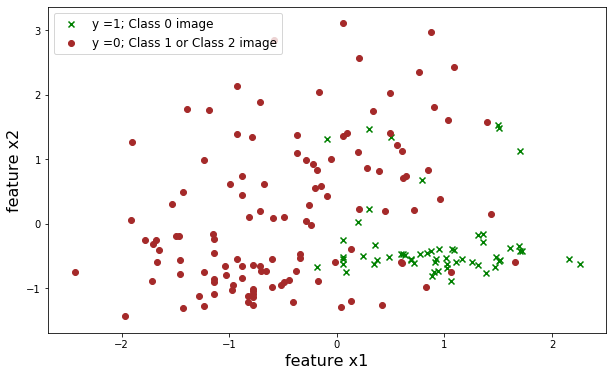

In [7]:
# Load the features
X = feature_matrix()
# Load labels
y = labels() 

idx_1 = np.where(y == 1) # indices of class 0 images
idx_2 = np.where(y == 0) # indices of not class 0 images

# Plot scatterplot of dataset with different markings for class 0 images
fig, axes = plt.subplots(figsize=(10, 6))
axes.scatter(X[idx_1, 0], X[idx_1, 1], c='green', marker ='x', label='y =1; Class 0 image')
axes.scatter(X[idx_2, 0], X[idx_2, 1], c='brown', marker ='o', label='y =0; Class 1 or Class 2 image')

# Set axis labels and legend
axes.legend(loc='upper left', fontsize=12)
axes.set_xlabel('feature x1', fontsize=16)
axes.set_ylabel('feature x2', fontsize=16)
plt.show()

## Logistic Regression
<img src="../../../coursedata/R3_Classification/Log_Reg2.png" alt="Drawing" style="width: 600px;"/>

Our goal is to determine the label $y$ of an image based on its features $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. The label is $y=1$ if the image belongs to class 0 and $y=0$ otherwise (either class 1 or class 2). 

Similar to linear regression, **logistic regression** uses a linear function of the form $h^{(\mathbf{w})}(\mathbf{x})= \mathbf{w}^{T} \mathbf{x}$, with some weight vector $\mathbf{w} \in \mathbb{R}^{n}$, to predict the label $y$ based on the features $\mathbf{x}$. 

At this point it might seem strange to use the real-valued function $h^{(\mathbf{w})}(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ for predicting the binary label $y \in \{0,1\}$. Indeed, while the label $y$ can take on only values $0$ or $1$, the function $h^{(\mathbf{w})}(\mathbf{x})$ can take on any real number. 

However, it turns out to be useful to use the real-valued function $h^{(\mathbf{w})}(\mathbf{x})$ for predicting binary labels. First of all, we can easily obtain a predicted label $\hat{y} \in \{0,1\}$ simply by using the sign of $h^{(\mathbf{w})}(\mathbf{x})$, 
\begin{equation}
\hat{y} = \begin{cases} 1 & \mbox{ for } h^{(\mathbf{w})}(\mathbf{x}) \geq 0 \\ 0 & \mbox{ for } h^{(\mathbf{w})}(\mathbf{x}) < 0. \end{cases}
\end{equation} 
What is more, we can accompany the predicted label by a **measure of the confidence (or reliability)** in the classification $\hat{y}$ using the magnitude $|h^{(\mathbf{w})}(\mathbf{x})|$.

This, rather intuitive but informal, interpretation of the predictor $h^{(\mathbf{w})}(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ can be made mathematically precise by using a **probabilistic model** for the labels of data points. In particular, we could  model the true label $y$ of an image as a **random variable**. In particular, we consider $y$ as a (realization of a) binary random variable taking on the value $y=1$ with probability 
\begin{align} 
{\rm Prob}(y=1; \mathbf{w}) & = \frac{1}{1+{\rm exp}(-h^{(\mathbf{w})}(\mathbf{x}))} = \frac{1}{1+{\rm exp}(-\mathbf{w}^{T}\mathbf{x})}. 
\end{align}

Note that the probability depends on the weight vector $\mathbf{w}$ which has to be determined (learnt) from data.

Since the label $y$ must take on either $1$ or $0$, which implies ${\rm Prob}(y=0;\mathbf{w}) + {\rm Prob}(y=1;\mathbf{w})=1$, we have  

\begin{align} 
{\rm Prob}(y=0; \mathbf{w}) & = 1- \frac{1}{1+{\rm exp}(-\mathbf{w}^{T}\mathbf{x})}  = \frac{1}{1+{\rm exp}(\mathbf{w}^{T}\mathbf{x})}. 
\end{align}

To evaluate the probability ${\rm Prob}(y=1;\mathbf{w})$, we need to specify the weight vector $\mathbf{w}$ and we need to know the feature vector $\mathbf{x}$ of an image. The feature vector $\mathbf{x}$ of an image is available via data analysis. The more challenging part is to come up with a good choice for the weight vector $\mathbf{w}$. 

A principled approach to find or **learn** a good choice for the weight vector $\mathbf{w}$ is to maximize the probability (or likelihood) of the labels $y^{(i)}$, $i=1,\ldots,m$, for the image-samples in our dataset. 
This **maximum likelihood** approach amounts to the following optimization problem  
\begin{equation}
\tag{3}
\widehat{\mathbf{w}} = {\rm argmax} \prod_{i=1}^{m} {\rm Prob}(y = y^{(i)}; \mathbf{w}),
\label{logloss_ml}
\end{equation} 

where the likelihood is maximized with respect to $\mathbf{w}$.

The product over all samples $i=1,\ldots,m$ arises from the assumption that the samples are realizations of independent and identically distributed (i.i.d.) random variables. We will not use this proabilistic interpretation in what follows but instead we will show that this maximum likelihood approach is equivalent to the minimization a certain loss function, the **logistic loss**. 

As detailed in the course book (Section 3.4), solving the above maximum likelihood problem is equivalent to minimizing the average **logistic loss**. The logistic loss incurred by a linear predictor $h^{(\mathbf{w})}(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$, using the weight vector $\mathbf{w}$, when applied to a data point with features $\mathbf{x}$ and true label $y$ is defined as:

\begin{equation*}
    \mathcal{L}\big((\mathbf{x},y);\mathbf{w}\big) = -y\ln\big(\sigma\big( \mathbf{w}^{T} \mathbf{x} \big)\big)-(1-y)\ln\big(1-\sigma\big(\mathbf{w}^{T}\mathbf{x}\big) \big). 
    \label{loss}
    \tag{4}
\end{equation*}
Here, we use the **sigmoid function** 
\begin{equation*}
    \sigma(z)= \frac{1}{1+{\rm exp}(-z)}
    \label{sigmoid}
    \tag{5}
\end{equation*}

Since we have $m=178$ labeled samples with features $\mathbf{x}^{(i)}$ and labels $y^{(i)}$, for $i=1,\ldots,m$, we can evaluate the logistic loss for all those samples to obtain the average loss or **empirical risk** 
\begin{align}
\mathcal{E}(\mathbf{w}) 
& = (1/m) \sum_{i=1}^{m} \mathcal{L}((\mathbf{x}^{(i)},y^{(i)}),\ h^{(\mathbf{w})}) \nonumber \\ 
&  = (1/m) \sum_{i=1}^{m}\big[ -y^{(i)}\ln\big({\rm Prob}(y=1; \mathbf{w})\big)-(1-y^{(i)})\ln\big(1-{\rm Prob}(y=1; \mathbf{w})\big) \big] \\
&  = (1/m) \sum_{i=1}^{m}\big[ -y^{(i)}\ln\big(\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1-\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big) \big]. 
   \label{erm}
    \tag{6}
\end{align}
The empirical risk $\mathcal{E}(\mathbf{w})$ is a measure for how well a classifier $h^{(\mathbf{w})}=\mathbf{w}^{T} \mathbf{x}$ agrees with the labeled data points $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ for $i=1,\ldots,m$. If the risk $\mathcal{E}(\mathbf{w})$ is small, then the classifier agrees well with the labeled data points. 

Naturally, we should chose the weight vector $\mathbf{w}$ to make $\mathcal{E}(\mathbf{w})$ as small as possible. It turns out that chosing the weight vector in order to minimize the empirical risk is in fact the same as chosing the weight vector via the maximum likelihood estimate $\widehat{\mathbf{w}}$ \eqref{logloss_ml}: 

\begin{align}
\widehat{\mathbf{w}} & = {\rm argmin}_{\mathbf{w} \in \mathbb{R}^{n}} \mathcal{E}(\mathbf{w}) \nonumber \\ 
& = {\rm argmin}_{\mathbf{w} \in \mathbb{R}^{n}} (1/m) \sum_{i=1}^{m} \big[-y^{(i)}\ln\big(\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1- \sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)\big]. 
\end{align}


Note that the empirical risk $\mathcal{E}( \mathbf{w})$ is a differentiable convex function of the weight vector $\mathbf{w}$. Such functions can be minimized efficiently using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) (see [course book](https://arxiv.org/pdf/1805.05052.pdf), Chapter 5 for more details). Moreover, the Python library `scikit-learn` provides the class `LogisticRegression()` for linear classifiers that are optimizing using the logistic loss. In particular, the function [`LogisticRegression.fit(X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) minimizes the empirical risk for data points whose features are stored in the numpy array `X` and labels are stored in the numpy array `y`.


<b><font size=4>Summary. Logistic Regression</font></b>

* Linear functions can be used in classification task
* One of the popular linear classifier is logistic regression
* For linear predictor $h^{(\mathbf{w})}(\mathbf{x})= \mathbf{w}^{T} \mathbf{x}$, we can assign a class label based on the sign of  $h^{(\mathbf{w})}(\mathbf{x})$: if $h^{(\mathbf{w})}(\mathbf{x})$ > 0 the assigned class is 1 and if $h^{(\mathbf{w})}(\mathbf{x})$ < 0 the assigned class is 0.
* We want to choose such a weight vector $\mathbf{w}$ that maximizes the probability (or likelihood) of the labels belonging to a specific class
* Maximazing this probability is similar to minimizing the logistic loss


<img src="../../../coursedata/R3_Classification/logreg1.jpg" alt="Drawing" style="width: 500px;"/>

<a id='demoboundary'></a>
<div class=" alert alert-info">
    
### Demo. Logistic Loss.

The code snippet below plots the logistic loss $\mathcal{L}\big((\mathbf{x},y);\mathbf{w}\big) = -y\ln\big(\sigma\big( \mathbf{w}^{T} \mathbf{x} \big)\big)-(1-y)\ln\big(1-\sigma\big(\mathbf{w}^{T}\mathbf{x}\big) \big)$ as a function of the predictor value $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. The value $\mathbf{w}^{T} \mathbf{x}$ is interpreted as the confidence in the true label being equal to $1$. As soon as $\mathbf{w}^{T} \mathbf{x}> 0$ we classify a data point as $\hat{y} = 1$ and the absolute value $|\mathbf{w}^{T} \mathbf{x}|$ quantifies the confidence in this classification result. If the true label is $y=1$ then we would like the loss function to decrease $\mathcal{L}\big((\mathbf{x},y);\mathbf{w}\big)$ as $\mathbf{w}^{T} \mathbf{x}$ increases (towards $+\infty$). Similarly, if the true label of the data point is $y=0$, we would like the loss to decrease $\mathbf{w}^{T} \mathbf{x}$ as $\mathbf{w}^{T} \mathbf{x}$ decreases towards $- \infty$, since we are increasingly confident in the correct classification $\hat{y}=0$. 
</div>

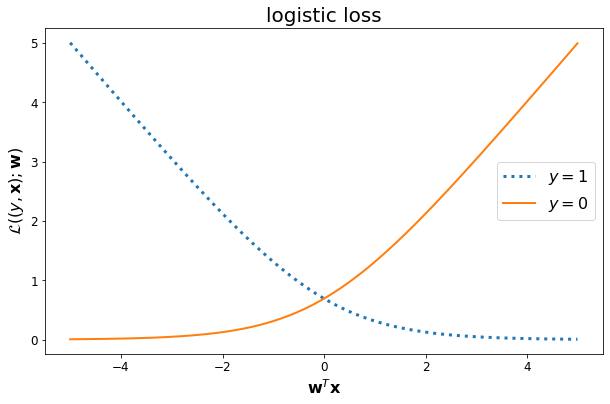

In [8]:
# Define sigmoid function according to formula (5)
def sigmoid_func(x):
    return 1/(1 + np.exp(-x))

# Choose values (w^T*x) for calculating loss 
range_x = np.arange(-5 , 5 , 0.01)

# Calculate logistic loss for y=1 and y=0
logloss_y1 = -np.log(sigmoid_func(range_x))
logloss_y0 = -np.log(1-sigmoid_func(range_x))

# Set fontsizes for matplotlib
plt.rc('legend', fontsize=16) 
plt.rc('axes', labelsize=16) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
     
# Plot the results, using the plot function in matplotlib.pyplot.
fig, axes = plt.subplots(1, 1, figsize=(10, 6)) 
axes.plot(range_x, logloss_y1, linestyle=':', label=r'$y=1$', linewidth=3.0)
axes.plot(range_x, logloss_y0, label=r'$y=0$', linewidth=2.0)

# Set axis labels and title
axes.set_xlabel(r'$\mathbf{w}^{T}\mathbf{x}$')
axes.set_ylabel(r'$\mathcal{L}((y,\mathbf{x});\mathbf{w})$')
axes.set_title("logistic loss", fontsize=20)
axes.legend()
plt.show()

<a id='demoboundary'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Logistic vs. Squared Error Loss.
    
Extend the demo above by adding the squared error loss $(y-\mathbf{w}^{T}\mathbf{x})^{2}$ for cases $y=1$. Store the values of the loss function for various values of $\mathbf{w}^{T} \mathbf{x}$ in the numpy array `squaredloss_y1`. These numpy array should have the same shape as the numpy array `range_x` which is already created in the code snippet below. 

</div>

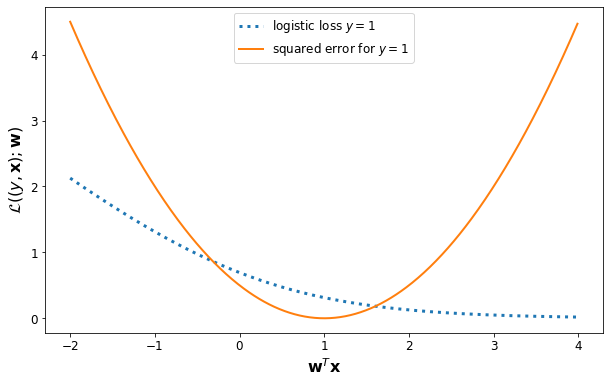

In [9]:
# define sigmoid function according to formula (5)
def sigmoid_func(x):
    return 1/(1 + np.exp(-x))

# Choose values (w^T*x) for calculating loss 
range_x = np.arange(-2 , 4 , 0.01)

# Calculate logistic loss for y=1
logloss_y1 = -np.log(sigmoid_func(range_x))

### STUDENT TASK ###
# squaredloss_y1 = ...
# YOUR CODE HERE
#raise NotImplementedError()
squaredloss_y1 = np.power((1 - range_x),2)


# Font sizes for matplotlib
plt.rc('legend', fontsize=12) 
plt.rc('axes', labelsize=16) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

# Plot the results
# IMPORTANT!: Please don't change below code for plotting, else the tests will fail and you will lose points
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.plot(range_x, logloss_y1, linestyle=':', label=r'logistic loss $y=1$', linewidth=3.0)
axes.plot(range_x, squaredloss_y1/2, label=r'squared error for $y=1$', linewidth=2.0)

# Set axes label and legend
axes.set_xlabel(r'$\mathbf{w}^{T}\mathbf{x}$')
axes.set_ylabel(r'$\mathcal{L}((y,\mathbf{x});\mathbf{w})$')
axes.legend()
plt.show()

We can see that logistic loss for y=1 (true label) decreasing with  $\mathbf{w}^{T}\mathbf{x}$ getting larger.

In contrast, squared error loss increasing when the $\mathbf{w}^{T}\mathbf{x}$ is far from 1 (true label). Therefore, squared error loss for the datapoints which are $\mathbf{w}^{T}\mathbf{x}$>0, but far from true label (in this case y=1) will be large, which is bad loss function for assessing the quality of a predictor $h^{(\mathbf{w})}(\mathbf{x})$

\begin{equation}
\hat{y} = \begin{cases} 1 & \mbox{ for } h^{(\mathbf{w})}(\mathbf{x}) \geq 0 \\ 0 & \mbox{ for } h^{(\mathbf{w})}(\mathbf{x}) < 0. \end{cases}
\end{equation} 


In [10]:
# Perform some sanity checks on the outputs
print(f"First entry of squaredloss_y1: {squaredloss_y1[0]}")
print(f"Last entry of squaredloss_y1: {squaredloss_y1[-1]}")
np.testing.assert_allclose(squaredloss_y1[0], 9.0, atol=1e-2, err_msg="First entry of squaredloss_y1 should be equal to approximately 9.0")
np.testing.assert_allclose(squaredloss_y1[-1], 8.94, atol=1e-2, err_msg="Last entry of squaredloss_y1 should be equal to approximately 8.94")
print('Sanity check tests passed!')


First entry of squaredloss_y1: 9.0
Last entry of squaredloss_y1: 8.940100000000033
Sanity check tests passed!


<a id='logisticregression'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Logistic Regression. 

Use the Python function `sklearn.linear_model.LogisticRegression` to:

* Initialize the logistic regression model with `LogisticRegression(random_state=0,C=1e6)`. Refer to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
* Compute the optimal weight vector $\widehat{\mathbf{w}}$ which minimizes the average logistic loss on the training data $(\mathbf{x}^{(i)},y^{(i)})$ for $i=1,\ldots,m$. You can use the function [`LogisticRegression.fit(X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) which uses as input the feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ and the label vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T}$.
    
* Predict labels for the image data using the function [`predict(X)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) which uses as input the feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$. The obtained predicted labels should be stored in the variable `y_pred`. Refer to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict).    
</div>

In [11]:
# Load the features and labels
X = feature_matrix()
y = labels() 

### BEGIN STUDENT TASK ###
# log_reg = ...
# log_reg. ...
# y_pred = ...
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0,C=1e6) 
log_reg = log_reg.fit(X, y)
y_pred = log_reg.predict(X)

In [12]:
# Tests
assert y_pred.shape == (178,), "y_pred has wrong dimensions."
print('Sanity check tests passed!')


Sanity check tests passed!


### Decision Boundary of Logistic Regression 

After we have learnt the predictor function, or its weight $\widehat{\mathbf{w}}$, we can classify any new image according to $\hat{y}=1$ if $h(\mathbf{x}) = \widehat{\mathbf{w}}^{T} \mathbf{x} > 0$ and $\hat{y}=0$ otherwise. Thus, our classifier divides all image-samples into two halfspaces of $\mathbb{R}^{2}$ (since we are only using two features to characterize an image). 

The image-samples which are classified as $\hat{y} =1$ belong to the halfspace $\{ \mathbf{x}: \hat{\mathbf{w}}^{T} \mathbf{x} > 0 \}$, while all the images which are classified as $\hat{y} = 0$ belong to the half-space $\{ \mathbf{x}: \hat{\mathbf{w}}^{T} \mathbf{x} < 0 \}$. These two half-spaces are separated by the decision boundary $\{ \mathbf{x}: \hat{\mathbf{w}}^{T} \mathbf{x} =0\}$. 

For most training data, the decision boundary determined by logistic regression will not perfectly separate the training data points according to $y^{(i)}=1$ and $y^{(i)}=0$. Thus, we typically have training samples with the same true label but which are located at oposite sides of the decision boundary. However, the decision boundary will be chosen such that on each side one class dominates. 

The decision boundary provides also a geometric interpretation of the magnitude $|\widehat{\mathbf{w}}^{T} \mathbf{x}|$ as the normal distance of a data point with features $\mathbf{x}$ to the decision boundary. Thus, the larger $|\widehat{\mathbf{w}}^{T} \mathbf{x}|$, the farther away is the data point from the decision boundary and, in turn, the more reliable is the predicted label $\hat{y}$ for this data point. On the other hand, if $|\widehat{\mathbf{w}}^{T} \mathbf{x}| \approx 0$, then the data point with features $\mathbf{x}$ is close to the decision boundary, i.e., it is a border case which cannot be classified reliably.


<a id='demoboundary'></a>
<div class=" alert alert-info">
    
### Demo. Linear Decision Boundary.

The code snippet below learns a linear predictor function $h(\mathbf{x}) =\widehat{\mathbf{w}}^{T} \mathbf{x}$ using logistic regression using only the first two features $x_{1}$ and $x_{2}$ of an image. It then creates a scatter plot of the image samples $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ for $i=1,\ldots,m$. All samples with $y^{(i)} = 1$ are indicated by "x" while all samples with true label $y^{(i)} =0$ are indicated by "o". The scatter plot also indicates the decision boundary $\{\mathbf{x}: \widehat{\mathbf{w}}^{T} \mathbf{x}=0 \}$. 

<p>Note that the training data is not perfectly separable by a linear decision boundary. In other words, there is no straight line such that on each side of the line are only data points with the same label.  
</p>
</div>

Accuracy of classification: 85.96%


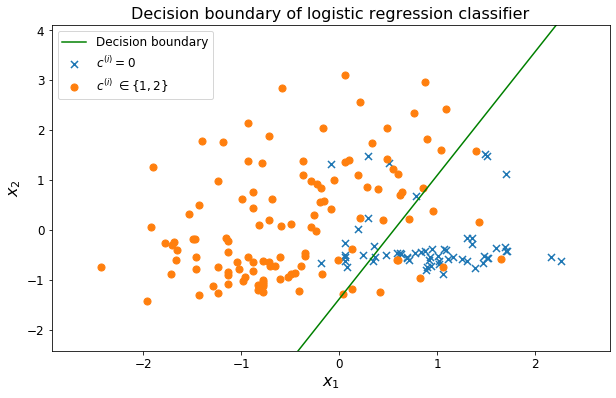

In [13]:
# Load the features and labels
X = feature_matrix()
y = labels() 

# Use only the first two features
X = X[:,:2]  

# Create an instance of Logistic Regression Classifier and fit the data.
log_reg = LogisticRegression(C=1e6, random_state=0)
log_reg.fit(X, y)

# Get the weights of the fitted model
w = log_reg.coef_ 
w = w.reshape(-1)

# Get the predicted labels for X
y_pred = log_reg.predict(X)

# Calculate the accuracy of the predictions
accuracy = metrics.accuracy_score(y, y_pred)
print(f"Accuracy of classification: {round(100*accuracy, 2)}%")

# Minimum and maximum values of features x1 and x2
x1_min, x2_min = np.min(X, axis=0)
x1_max, x2_max = np.max(X, axis=0)

# Plot the decision boundary h(x) = 0
# for data with 2 features this means w1x1 + w2x2 + bias = 0 --> x2 = (-1/w2)*(w1x1+bias)
x_grid = np.linspace(x1_min, x1_max, 100)
y_boundary = (-1/w[1])*(x_grid*w[0] + log_reg.intercept_)

plt.figure(figsize=(10, 6))
idx_1 = np.where(y == 1)[0] # index of each class 0 image.
idx_2 = np.where(y == 0)[0] # index of each not class 0 image.
plt.scatter(X[idx_1, 0], X[idx_1, 1], marker='x', s=50, label=r'$c^{(i)}=0$')
plt.scatter(X[idx_2, 0], X[idx_2, 1], marker='o', s=50, label=r'$c^{(i)} \in \{1,2\}$')
plt.plot(x_grid, y_boundary, color='green', label="Decision boundary")
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')
plt.title("Decision boundary of logistic regression classifier", fontsize=16)
plt.xlim(x1_min-.5, x1_max+.5)
plt.ylim(x2_min-1, x2_max+1)
plt.legend()
plt.show()

 <b><center><font size=4>Bonus Task!</font></center></b> 
 
 Bonus task worth of 50 points.
 
 Explain what regularization parameter C does in scikit-learn LogisticRegression and how to choose appropriate C. Please send your answer to Alex or the course assistants via e-mail or on Slack!
 

### Accuracy - How well did we do?
After we have computed the optimal weight $\widehat{\mathbf{w}}$ using logistic regression, we can calculate the accuracy of the resulting classifier as the fraction of correctly labeled images (for which $y^{(i)} = \hat{y}^{(i)}$):

\begin{equation*}
    \text{Accuracy} =\dfrac{1}{m} \sum_{i=1}^{m} \mathcal{I}(\hat{y}^{(i)} = y^{(i)})
    \label{acc}
    \tag{7}
\end{equation*}

Here $\mathcal{I}(\hat{y}^{(i)} = y^{(i)})$ denotes the indicator function which is equal to one if $\hat{y}^{(i)} = y^{(i)}$ and equal to zero otherwise. 

<a id='logregaccuracy'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Compute Accuracy. 
 
Implement a Python function `calculate_accuracy(y, y_hat)` which takes as inputs a vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T}$ of true labels and another vector $\mathbf{\hat{y}}=\big(\hat{y}^{(1)},\ldots,\hat{y}^{(m)}\big)^{T}$ containing predicted labels.
The function should return the accuracy according to above definition as a **percentage**. Thus, if all samples are classified correctly, the returned value should be $100$. 
</div>

In [14]:
def calculate_accuracy(y, y_hat):
    """
    Calculate accuracy of your prediction
    
    :param y: array-like, shape=(m,), correct label vector
    :param y_hat: array-like, shape=(m,), label-vector prediction
    
    :return: scalar-like, percentual accuracy of your prediction
    """
    ### STUDENT TASK ###
    # YOUR CODE HERE
    #raise NotImplementedError()
    sums = 0
    if (len(y) == len(y_hat)):
        for i in range(len(y)):
            if(y[i] == y_hat[i]):
                sums += 1
        accuracy = sums/len(y)
    else:
        accuracy = 0
    return accuracy * 100

In the next cell we execute the implemented function and test that it works properly.

In [15]:
# Get data and select 10 features to be used for prediction
X = feature_matrix()
X = X[:,:10]
y = labels()

# Train logistic regression model and get predicted labels
log_reg = LogisticRegression(random_state=0)
log_reg = log_reg.fit(X, y)
y_pred = log_reg.predict(X)
            
# Perform some sanity checks on the outputs
test_acc = calculate_accuracy(y, y_pred)
print (f'Accuracy of the result is: {test_acc}')
assert 80 < test_acc < 100, "Your accuracy should be above 80% and less than 100%"
assert test_acc < 99, "Your accuracy was too good. You are probably not using correct methods."
print('Sanity check tests passed!')


Accuracy of the result is: 98.87640449438202
Sanity check tests passed!


## Multiclass Classification

So far, we have considered the problem of classifying an image as $y=1$ if it belongs to "class 0" and as $y=0$ if not, i.e., if it belongs to "class 1" or "class 2". We have solved this binary classification problem using logistic regression. However, our ultimate goal is to classify an image according to all three categories of the images. 

There is a simple but useful trick for **upgrading** any binary classification method to handle more than two different label values or classes. The idea behind this trick which is known as **one vs. rest** is quite simple: just split the multiclass classification problem into several subproblems, each subproblem being one binary classification problem. We then apply a binary classification method (such as logistic regression) to each of the subproblems and combine their results to obtain a predicted label for the multiclass problem. 

For the image classification problem, using the three classes "0", "1" or "2", we obtain the following binary classification subproblems: 

- subproblem 0: classify samples into "Class 0" $(y=1)$ vs. "not Class 0" $(y=0)$  
- subproblem 1: classify samples into "Class 1" $(y=1)$ vs. "not Class 1" $(y=0)$  
- subproblem 2: classify samples into "Class 2" $(y=1)$ vs. "not Class 2" $(y=0)$

Each subproblem amounts to testing if the image belongs to a particular class or not. The $k$th subproblem can be solved using logistic regression yielding a predictor $h^{(\mathbf{w}_{k})}(\mathbf{x})= (\mathbf{w}_{k})^{T} \mathbf{x}$. The predictor $h^{(\mathbf{w}_{k})}(\mathbf{x})= (\mathbf{w}_{k})^{T} \mathbf{x}$ indicates how likely the image belongs to the class $k$. We then assign the image to those class $k$ for which $h^{(\mathbf{w}_{k})}(\mathbf{x})$ is largest. 

### Example

Assume we want to classify a new data point (which is different from the $m$ data points in our dataset). To this end, we compute the feature vector $\mathbf{x}=(x_{1},x_{2},...,x_{13})^{T}$ of this new data point and apply the three subproblem predictors, yielding the following prediction values: 

* subproblem 0: $h^{(\mathbf{w}_{0})}(\mathbf{x}) = 0.1$ ("Class 0 vs. not Class 0")
* subproblem 1: $h^{(\mathbf{w}_{1})}(\mathbf{x}) = 0.4$ ("Class 1 vs. not Class 1") 
* subproblem 2: $h^{(\mathbf{w}_{2})}(\mathbf{x}) = 0.8$ ("Class 2 vs. not Class 2")

From these results, we can see that the predictor $h^{(\mathbf{w}^{(\rm Class 2)})}(x)$ for subproblem 3 (`Class 2` vs. `not Class 2`) yields the highest confidence. Hence, we classify this new data point as `Class 2`. 

<img src="../../../coursedata/R3_Classification/Regression_Zebra.png" alt="Drawing" style="width: 400px;"/>


<a id='demoboundary'></a>
<div class=" alert alert-info">
    
### Demo. Multiclass Classification.

The code snippet below illustrates how multiclass classification via logistic regression can be implemented using the `scikit-learn` Python library ([click here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

</div>



In [16]:
# Load features and choose the first 8 features
X = feature_matrix()
X = X[:,:8]

# Load labels. This time, keep all classes as is (0,1,2)
y = pd.read_csv("/coursedata/R3_Classification/image_labels.csv", header=None).to_numpy()
y = y.reshape(-1)

# Fit logistic regression model
log_reg = LogisticRegression(random_state=0, multi_class="ovr") # set multi_class to one versus rest ('ovr')
log_reg = log_reg.fit(X, y)

# Predict labels and probabilities
y_pred = log_reg.predict(X)
pred_probabilities = log_reg.predict_proba(X)

print(f"Predicted classes: {set(y_pred)}")
print(f"Predicted probability of each class for first data point: {pred_probabilities[0]}")
print(f"Predicted class for first data point: {y_pred[0]}")
print(f"True class for first data point: {y[0]}")

Predicted classes: {0, 1, 2}
Predicted probability of each class for first data point: [0.99046541 0.00310708 0.00642751]
Predicted class for first data point: 0
True class for first data point: 0


### Confusion Matrix

Computing the accuracy, as the fraction of correctly classified data points for which $\hat{y}^{(i)}=y^{(i)}$, is only one possible way to check how well you did. In some applications the accuracy is not very useful as a quality measure. In particular, for applications where the different classes occur with significantly different frequency ("imbalanced data"). A more fine-grained assessment of a classification method is provided by computing the confusion matrix. The confusion matrix considers the perfomance of a classifier individually for each possible value of the true label. In contrast, the accuracy is an average measure that averages over all possible label values.


<a id='logregconf'></a>
<div class=" alert alert-info">
    
### Demo. Confusion Matrix. 


Confusion matrix can be visualized with [`sklearn.metrics.plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn-metrics-plot-confusion-matrix). This function returns object `display`, where confusion matrix can be accessed with `display.confusion_matrix`.

The entry in the $i$th row and $j$th colums of the confusion matrix is the number of images that have true label $y=i$ but are classified as $\hat{y}=j$.   

You can read more about the confusion matrix and why it is useful at: https://en.wikipedia.org/wiki/Confusion_matrix
    
</div> 

Confusion matrix:
[[59  0  0]
 [ 1 67  3]
 [ 0  2 46]]

Normalized confusion matrix:
[[1.         0.         0.        ]
 [0.01408451 0.94366197 0.04225352]
 [0.         0.04166667 0.95833333]]



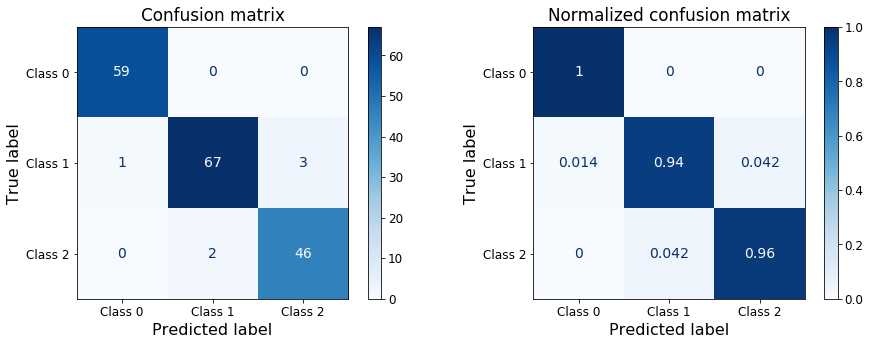

In [17]:
from sklearn.metrics import plot_confusion_matrix

# Define class labels for confusion matrices
classes = ['Class 0','Class 1','Class 2']

# Define plotting options (title, normalization, axes index)
options = [("Confusion matrix", None, 0),
           ("Normalized confusion matrix", 'true', 1)]

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
plt.rc('font', size=14)
for title, normalize, ax_idx in options:
    # main parameters of function `plot_confusion_matrix` are:
    # trained classifier (log_reg), data (X, y)
    disp = plot_confusion_matrix(log_reg, X, y,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=axes[ax_idx])
    disp.ax_.set_title(title)
    print(title + ":")
    # Disp.confusion_matrix returns confusion matrix as np.array
    print(f"{disp.confusion_matrix}\n")

plt.show()

## Reliability of (Confidence in) Classifications

We now show how to use logistic regression to get a measure of reliability of the predicted label $\hat{y}$. 

In particular, given an image with features $\mathbf{x}$, logistic regression computes the predicted label $\hat{y}$ using the sign of $h^{(\mathbf{w})}(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$. Moreover, we can use the magnitude of $h^{(\mathbf{w})}=\mathbf{w}^{T} \mathbf{x}$ as a measure for the reliability of the classification. If this value is too small, we conclude that logistic regression was not able to reliably classify the image and we should send it to a human for a more rigorous analysis. 

In what follows, we will apply a Python library function `log_reg.predict_proba(X)` to compute a confidence measure for the resulting classification $\hat{y}$. Instead of using the magnitude of $h^{(\mathbf{w})}=\mathbf{w}^{T} \mathbf{x}$, they use a related but different measure for the reliability. In particular, for a binary classification problem, this method computes the (estimated) probability ${\rm Prob}(y=1; \mathbf{w})= \frac{1}{1+{\rm exp}(-\mathbf{w}^{T}\mathbf{x})}$ that the true label is $1$. 

<a id='logregprobs'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Confidence in Classifications. 

Remember that logistic regression computes an optimal weight vector $\widehat{\mathbf{w}}$ for a linear predictor funtion $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ in order to minimize the average logistic loss incurred over some given labeled data points $(\mathbf{x}^{(i)},y^{(i)})$, $i=1,\ldots,m$ for which we already know the true labels $y^{(i)}$. 

One of the appealing properties of logistic regression is that it not only provides a tool for classifying data points, i.e., computing a predicted label $\hat{y}$, but also allows to quantify the reliability of (confidence in) the predicted label $\hat{y}$. 

Logistic regression uses a probabilistic model that allows to compute the (estimated) probabilities ${\rm Prob}(y=c|\widehat{\mathbf{w}})$ that the true label $y$ takes on a particular value $c$, e.g., $c=0,1,2$ in the image labelling application. Given an image with features $\mathbf{x}$, we choose the predicted label $\hat{y}$ as the particular value $c \in \{0,1,2\}$ which yields the maximum probability ${\rm Prob}(y=c|\widehat{\mathbf{w}})$. However, if this maximum probability ${\rm Prob}(y=\widehat{y}|\widehat{\mathbf{w}})$ is close to $1/2$ then the classification should be considered highly unreliable. 
 
- Use the Python function `log_reg.predict_proba(X)`, which reads in the feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ whose rows contain the feature vectors $\mathbf{x}^{(i)}$. For each data point with features $\mathbf{x}^{(i)}$, the function computes the probabilities ${\rm Prob}(y^{(i)}=c|\widehat{\mathbf{w}})$ of the true label $y^{(i)}$ belonging to the classes $c=\{0,1,2\}$.
- The Python function `log_reg.predict_proba(X)` returns a numpy array of shape (m,3) which represents a matrix 
$\mathbf{T} \in \mathbb{R}^{m \times 3}$. The $i$th row of $\mathbf{T}$ represents the probabities ${\rm Prob}(y^{(i)}=0|\widehat{\mathbf{w}})$, ${\rm Prob}(y^{(i)}=1|\widehat{\mathbf{w}})$ and ${\rm Prob}(y^{(i)}=2|\widehat{\mathbf{w}})$. The predicted label $\hat{y}$ is then the label $c$ with the maximum probability, 
$$ {\rm Prob}(y^{(i)}= \hat{y}^{(i)}|\widehat{\mathbf{w}}) = \max_{c\in \{0,1,2\}} {\rm Prob}(y^{(i)}= c|\widehat{\mathbf{w}}).$$

- Count the data points for which the predictions have a confidence of less than 90%. E.g., if predictions for a data point are "class 0": 89%, "class 1": 6% and "class 2": 5%, then the sample is discarded since we are not confident enough in the classification (which would be $\hat{y}=0$ in this case). Store the total number of discarded data points in the variable `n_discarded`. 


Hint: For more information, we refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba).
</div>

In [18]:
# Predict the probabilities
# y_probs = ...
# YOUR CODE HERE
#raise NotImplementedError()
X = feature_matrix()
X = X[:,:8]
y = pd.read_csv("/coursedata/R3_Classification/image_labels.csv", header=None).to_numpy()
y = y.reshape(-1)

# Fit logistic regression model
log_reg = LogisticRegression(random_state=0, multi_class="ovr") # set multi_class to one versus rest ('ovr')
log_reg = log_reg.fit(X, y)

y_probs = log_reg.predict_proba(X)

# Show the predicted probabilities of the first five data points
print('First five samples and their probabilities of belonging to classes 0, 1 and 2:')
for i in range(5):
    print(f"Probabilities of Sample {i+1}: Class 0: {round(100*y_probs[i][0],2)}%, Class 1: {round(100*y_probs[i][1],2)}%, Class 2: {round(100*y_probs[i][2],2)}%")

n_discarded = 0
# YOUR CODE HERE
#raise NotImplementedError()
for i  in range(len(y_probs)):
    if y_probs[i][0]*100 < 90:
        n_discarded+=1


print('Number of discarded samples:', n_discarded)

First five samples and their probabilities of belonging to classes 0, 1 and 2:
Probabilities of Sample 1: Class 0: 99.05%, Class 1: 0.31%, Class 2: 0.64%
Probabilities of Sample 2: Class 0: 92.98%, Class 1: 6.95%, Class 2: 0.07%
Probabilities of Sample 3: Class 0: 88.06%, Class 1: 11.83%, Class 2: 0.11%
Probabilities of Sample 4: Class 0: 99.5%, Class 1: 0.43%, Class 2: 0.07%
Probabilities of Sample 5: Class 0: 93.8%, Class 1: 3.58%, Class 2: 2.62%
Number of discarded samples: 134


In [19]:
# Perform some sanity checks on the outputs
assert n_discarded > 10, 'Number of discarded samples should be above 10.'
print('Sanity check tests passed!')



Sanity check tests passed!


## Decision Trees

We will learn another classification method which is referred to as **decision trees**. A decision tree is a flowchart-like representation of a predictor function $h(\mathbf{x})$ that reads in the features $\mathbf{x}$ of a data point and ouputs a predicted label $\hat{y}=h(\mathbf{x})$. The decision tree consists of **nodes** which represent certain tests, e.g., "is the first feature $x_{1}$ larger than 10?". The nodes are connected by **branches** that correspond to the result or outcome of a test (there is one outgoing branch for each possible answer of a test node). By following the branches, we end up at a leaf node (which has no further branches). Each leaf node is associated with a certain output value $h(\mathbf{x})$. The picture below depicts a decision tree with test nodes colored blue and leaf nodes colored orange and green. 

<img src="../../../coursedata/R3_Classification/Decision_Tree.png" alt="Drawing" style="width: 400px;"/>

Now you might wonder how do we choose the test nodes? The basic idea is the same as in linear or logistic regression, we try out many different decision trees (using different choices of test nodes) and pick the one which results in the smallest average loss incurred on some labeled training data points $(\mathbf{x}^{(i)},y^{(i)})$. However, in contrast to logistic regression, this learning or optimization problem involves searching over a discrete set of different configurations of test nodes instead of a continuous convex optimization of a weight vector $\mathbf{w}$. This makes learning decision trees compupationally more challenging compared to logistic regression which allows to use efficient convex optimization methods (such as plain gradient descent). However, there have been developed clever ways to learn good decision trees with a reasonable amout of computational resources.  

Video on basic concept of decision trees:

- https://www.youtube.com/watch?v=9w16p4QmkAI

If you want to learn more details about decision trees, beyond the requirements of this course, we refer you to: 

- https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
- https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain
- https://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html

<a id='demotreeboundary'></a>
<div class=" alert alert-info">
<b>Demo.</b> Decision Boundary of a Decision Tree.

The code snippet below learns a predictor function $h(\mathbf{x})$ using decision trees based on the first two features $x_{1}$ and $x_{2}$ of the images. It then creates a scatter plot of the training samples $(\mathbf{x}^{(i)},y^{(i)}$. All samples with $y^{(i)} = 1$ are indicated by "x" while all samples with true label $y^{(i)} =0$ are indicated by "o". The scatter plot also indicates the decision boundary $\{\mathbf{x}: \widehat{\mathbf{w}}^{T} \mathbf{x}=0 \}$. 

Note that the training data is not perfectly separable by a linear decision boundary. 

</div>

In [20]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    """Function with which to plot decision boundary"""
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    x = np.arange(x_min, x_max, h)
    y = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(x, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    indx_1 = np.where(Y == 1)[0] # index of each class 0 iamge.
    indx_2 = np.where(Y == 0)[0] # index of each not class 0 image
    
    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plt.scatter(X[indx_1, 0], X[indx_1, 1],marker='x',label='class 0', edgecolors='k')
    plt.scatter(X[indx_2, 0], X[indx_2, 1],marker='o',label='class 1', edgecolors='k')
    plt.xlabel(r'Feature 1')
    plt.ylabel(r'Feature 2')

Accuracy: 100.0%


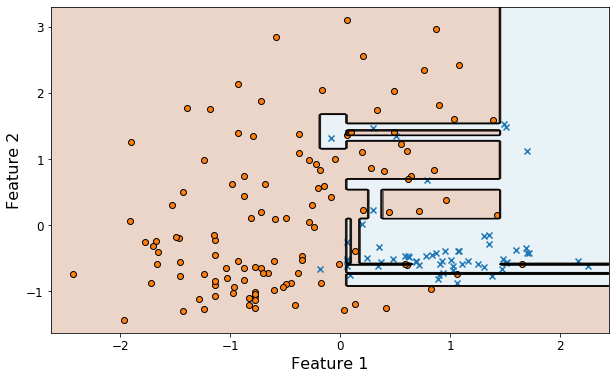

In [21]:
# Load data and select only the first two features
X = feature_matrix()
X = X[:,:2]
y = labels()

clf = DecisionTreeClassifier()   # define object "clf" which represents a decision tree
clf.fit(X, y)                    # learn a decision tree that fits well the labeled images  
y_pred = clf.predict(X)          # compute the predicted labels for the images

# Calculate the accuracy score of the predictions
accuracy = metrics.accuracy_score(y, y_pred)
print(f"Accuracy: {round(100*accuracy, 2)}%")

# Plot decision boundary
plot_decision_boundary(clf, X, y)
plt.show()

<a id='dtclassifier'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Decision Tree Classifier.
    
Create a decision tree classifier using the sklearn DecisionTreeClassifier imported in the previous cell. Use the following parameters for the classifier: `DecisionTreeClassifier(random_state=0, criterion='entropy')`. The argument `criterion` corresponds to a particular choice for the loss function to be used. For background information consult the [`documentation`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Choose or learn a good decision tree using the [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) function. Using the learnt decision tree, compute the predicted labels $\hat{y}^{(i)}$ for the training data using the function [`DecisionTreeClassifier.predict`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) and save it to numpy array `y_pred`.
</div>

In [62]:
# Load data to feature matrix X and label vector y 
X = feature_matrix()
y = pd.read_csv("/coursedata/R3_Classification/image_labels.csv", header = None).to_numpy()
y = y.reshape(-1)
feature_cols = ["x" + str(i) for i in range(len(X[0,:]))] # needed for visualization

### STUDENT TASK ###
# clf = ...
# clf. ...
# y_pred = ...
# accuracy = ...
# YOUR CODE HERE
#raise NotImplementedError()
clf = DecisionTreeClassifier() 
clf.fit(X, y)                    
y_pred = clf.predict(X)    
accuracy = metrics.accuracy_score(y, y_pred)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(100*accuracy, 2), '%')

Accuracy: 100.0 %


In [63]:
# Perform some sanity checks on the outputs
assert X.shape == (178, 13), "Training set label matrix has wrong dimensions."
assert y.shape == (178,), "label vector has wrong dimensions."
assert y_pred.shape == (178,), "Prediction vector has wrong dimensions."
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='dtcm'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Confusion Matrix.

Use the `plot_confusion_matrix` of `sklearn.metrics` to calculate and visualize non-normalized confusion matrix for data (X, y) and classifier (clf) obtained from the previous student task. Store the resulting confusion matrix in a variable named `cm`.

Hints:

* Look at the Demo.Confusion Matrix. 
* Object returned by `plot_confusion_matrix` (`display`) is used to access confusion matrix with `display.confusion_matrix`.
</div>

Confusion matrix
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


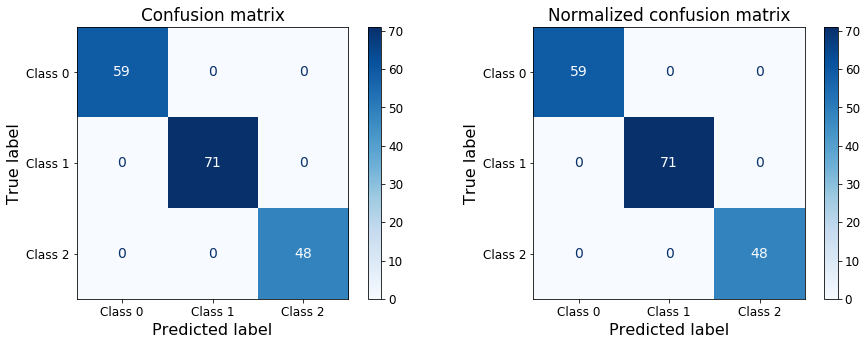

In [67]:
#from sklearn.metrics import plot_confusion_matrix
# Define class names and title for confusion matrix
classes = ['Class 0','Class 1','Class 2']
title = "Confusion matrix, without normalization"
#fig, axes = plt.subplots(1, 1, figsize=(8, 5)) 


# Create a display object with plot_confusion_matrix
# Set parameters display_labels=classes, cmap=plt.cm.Blues, ax=axes 
# disp = ...
# cm = ...
# YOUR CODE HERE
#raise NotImplementedError()

# Define plotting options (title, normalization, axes index)
options = [("Confusion matrix", None, 0),
           ("Normalized confusion matrix", 'true', 1)]

# Plot confusion matrices

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
plt.rc('font', size=14)
for title, normalize, ax_idx in options:
    disp = plot_confusion_matrix(clf, X, y,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=axes[ax_idx])
    disp.ax_.set_title(title)

cm = disp.confusion_matrix
# Print title and confusion matrix
print(options[0][0])
print(cm)

plt.show()

In [65]:
# Perform some sanity check on the result
assert cm.shape == (3,3), "Confusion Matrix has wrong dimensions."
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='dtvis'></a>
<div class=" alert alert-info">
    
### Demo. Visualizing the decision tree. 
- Run the below cell to visualize the decision tree.
</div>

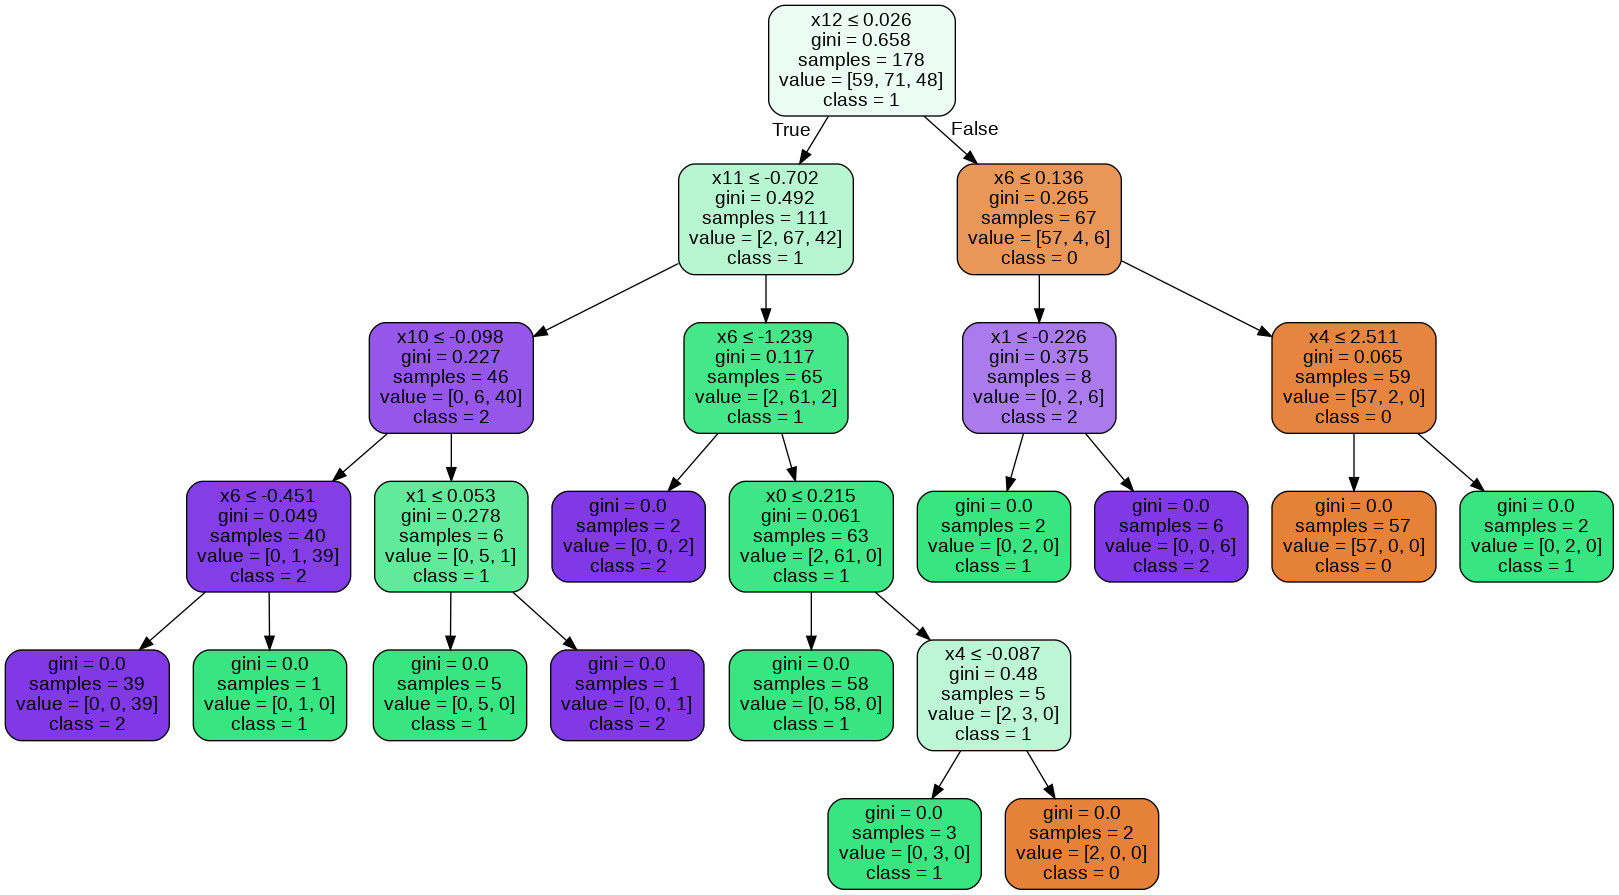

In [66]:
# Load libraries
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

X = feature_matrix()
feature_cols = ["x" + str(i) for i in range(len(X[0,:]))] # needed for visualization

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Difference between logistic regression and decision trees

The two classification methods logistic regression and decision trees both aim at learning a good predictor $h(\mathbf{x})$ which allows determining the label $y$ of the data point based on some features $\mathbf{x}$. These two classification methods differ in the form of predictor function $h(\mathbf{x})$ they are using. Logistic regression uses linear predictor functions $h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ (which are thresholded to get discrete label predictions $\hat{y}$). 

In contrast to linear functions used in logistic regression, decision trees use predictor functions that are obtained from flow charts (decision trees) consisting of various tests on the features $\mathbf{x}$. Using sufficiently large decision trees allows to represent highly non-linear functions $h(\mathbf{x})$. In particular, decision trees can perfectly separate data points (according to their labels) which cannot be separated by any straight line (which are the only possible decision boundaries for logistic regression). 

<table><tr>
    <td><img src='../../../coursedata/R3_Classification/lr1.png' style="width: 300px;"></td>
    <td><img src='../../../coursedata/R3_Classification/tree1.png' style="width: 300px;"></td>
</tr></table>

<a id='Bonus trees'></a>
<div class=" alert alert-warning">
    <b>Bonus Task.</b> Descision trees. 
    
Bonus task worth of 50 points.
    
We can see that with descision trees classification we can achieve 100% accuracy on training dataset. Not surprisingly, this can lead to overfitting and poor performance on validation datasets. Explain, how to regulate decision tree complexity and avoid overfitting?
</div>

## Take Home Quiz 

Try to answer the following questions by setting the `answer_R3_Q??` variable for each question to the number of the correct answer. For example, if you think that the second answer in the first quizz question is the right one, then set `answer_R3_Q1=2`. 

<a id='QuestionR3_1'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Question R3.1. 

<p>How many features can be used for logistic regression?</p>

<ol>
  <li>None</li>
  <li>One (1)</li>
  <li>Thirteen (13)</li>
  <li>Any number of features (given enough computational resources)</li>
</ol> 

</div>

In [ ]:
# answer_Q1

answer_R3_Q1  = 2
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# this cell is for tests
assert answer_R3_Q1 in [1,2,3,4], '"answer_R3_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


<a id='QuestionR3_2'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Question R3.2. 

<p>When performing logistic regression, we are trying to....</p>

<ol>
  <li>Solving a minimum likelihood problem.</li>
  <li>Maximize the average logistic loss.</li>
  <li>Minimize the average logistic loss.</li>
</ol> 

</div>

In [ ]:
# answer_Q2

answer_R3_Q2 = 3
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# this cell is for tests
assert answer_R3_Q2 in [1,2,3], '"answer_R3_Q2" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


<a id='QuestionR3_3'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Question R3.3. 

<p>Consider an arbitrary set of $m$ labeled data points having two features $\mathbf{x}^{(i)} \in \big(x^{(i)}_{1},x^{(i)}_{2}\big)^{T}$ and a binary label $y^{(i)} \in \{0,1\}$. How large can the sample size $m$ be such that we can for sure always find a straight line such that all points $\mathbf{x}^{(i)}$ with the same label $y^{(i)}$ lie on the same side (but not on top) of the line. </p>

<ol>
  <li>$m \leq 2$</li>
  <li>$m = 3$</li>
  <li>$m = 4$</li>
  <li>$m = 6$</li>
</ol> 

</div>

In [ ]:
# answer_Q3

answer_R3_Q3  = 1
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# this cell is for tests


assert answer_R3_Q3 in [1,2,3,4], '"answer_R3_Q3" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


<a id='QuestionR3.4.'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Question R3.4. 
Maximizing the probability (or likelihood) of the labels $y^{(i)}$, for $i=1,\ldots,m$ belonging to a class is:

1. Equivalent to maximizing logistic loss
2. Equivalent to minimizing logistic loss
3. Maximum likelihood problem is not related to logistic loss
</div>

In [ ]:
# answer_Q4

answer_R3_Q4 = 2
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# this cell is for tests
assert answer_R3_Q4 in [1,2,3], '"answer_R3_Q4" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')
